In [1]:
# For Google Colab Use
COLAB = False
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Coding/Projects/MarketMakingAgents/market-making-agents'
    #!git fetch origin
    #!git reset --hard origin/master
    #!git pull
    #!git checkout .

In [2]:
if COLAB:
    %load_ext tensorboard
    %tensorboard --logdir runs

    %reload_ext tensorboard
    # Note you can inspect the tensorboard and get url to open in new tab

# Clear any logs from previous runs
!rm -rf ./runs/

In [3]:
from Source.StockExchange import StockExchange

from Source.Agents.BaselineAgents import ImprovedRecycleAgent
from Source.Agents.DeepQNetwork import DQNMarketMaker
from Source.Agents.DeepDeterministicPolicyGradient import DDPGMarketMaker

from Source.TradingEnvironment import TradingEnvironment

import numpy as np
import matplotlib.pyplot as plt

Skew recycling metric:

skew * 10 + inventory

aim: this should be close to 0 always. Ie:

    if inventory == 10:

        Own a lot -> need to sell -> show low offer -> negative skew (-1)
        
    if inventory == -10:

        short a lot -> need to buy -> show high bid -> positive skew (+1)
        
Good score : 0

Bad Score : +- 10

Very bad: +- 20

Also:
- Can add a 'capital charge' -> ie each step holding inventory (positive or negative) incurs a penalty reward


In [4]:
TOTAL_STEPS = 5000
TOTAL_EPISODES = 50

DQN_ACTION_SPACE = [-1.0, -0.5, 0.0, 0.5, 1.0]
STATE_SPACE_SIZE = 2
CONTINUOUS_ACTION_SPACE_DIMENSION = 1

In [5]:
stockExchange = StockExchange(TOTAL_STEPS)

#marketMaker1 = ImprovedRecycleAgent(name='_recycleAgent1')
#marketMaker2 = DQNMarketMaker(DQN_ACTION_SPACE, STATE_SPACE_SIZE, name='_dqnAgent')
#marketMaker3 = ImprovedRecycleAgent(name='_recycleAgent1')
marketMaker4 = DDPGMarketMaker(CONTINUOUS_ACTION_SPACE_DIMENSION, STATE_SPACE_SIZE, name='_ddpgAgent')

listAgents = [marketMaker4] #[marketMaker1, marketMaker2, marketMaker3, marketMaker4]

tradingEnvironment = TradingEnvironment(listAgents, stockExchange)

/Users/chris/Applications/anaconda3/envs/cbenv/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [6]:
tradingEnvironment.trade(totalEpisodes=TOTAL_EPISODES)

     [-0.9930],
        [-0.8124],
        [-0.9930],
        [-0.5112],
        [-0.5112],
        [-0.9208],
        [-0.9645],
        [-0.9645],
        [-0.9645],
        [-0.9930],
        [-0.9930],
        [-0.8259],
        [-0.5199],
        [-0.9930],
        [-0.9843],
        [-0.8891],
        [-0.3549],
        [-0.9969],
        [-0.9987],
        [-0.5199],
        [-0.8259],
        [-0.9645],
        [-0.9208],
        [-0.9969],
        [-0.9987],
        [-0.5199],
        [-0.8259],
        [-0.5199],
        [-0.5112],
        [-0.5112],
        [-0.9930],
        [-0.9645],
        [-0.9987],
        [-0.6532],
        [-0.9930],
        [-0.9645],
        [-0.6532],
        [-0.8259],
        [-0.9930],
        [-0.6532],
        [-0.9843],
        [-0.9969],
        [-0.8259],
        [-0.8259],
        [-0.9843],
        [-0.9969],
        [-0.9969],
        [-0.6532],
        [-0.3549],
        [-0.5112],
        [-0.5199],
        [-0.9994],
        [-0.964

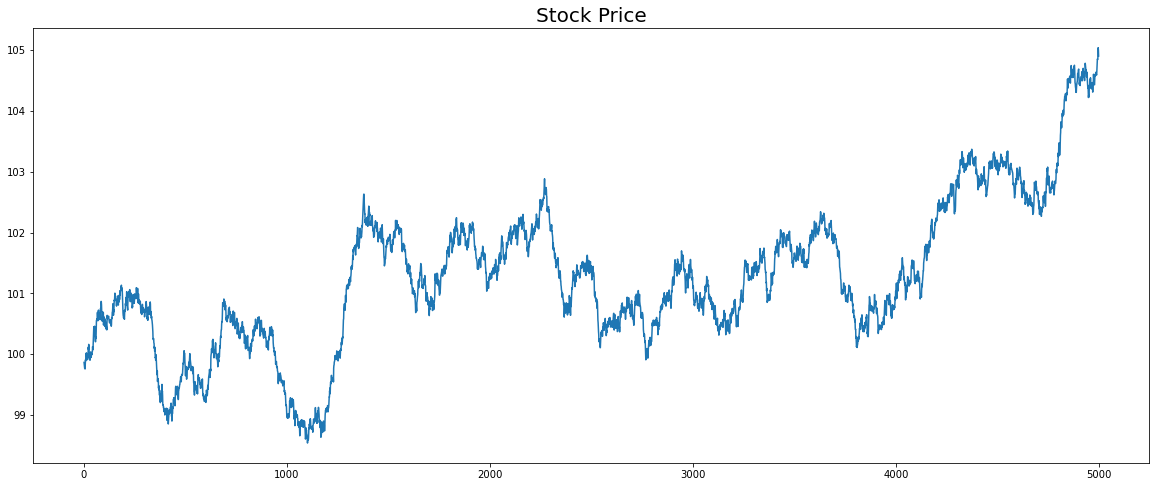

In [10]:
plt.figure(figsize=(20,8))
plt.plot(stockExchange._stockPriceProcess._priceProcess)
plt.title("Stock Price", size=20)
plt.show()